# Project 2
The main goal of this project is implement some image filters in the space domain.

# Setup
Setup inicial, ao final deveria aparecer a imagem desejada

In [1]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install opencv-python

You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.


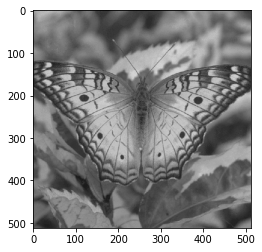

In [2]:
# Test setup, should show the baboon.png image
from skimage import io
import numpy as np
import matplotlib.pyplot as plt

# open image file and stores it in a numpy array
img = io.imread('png_images/butterfly.png')
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()

## Filtros
Todos os filtros que serão utilizados serão declarados aqui, como matrizes numpy

In [3]:
h1 = np.array([
    [0, 0, -1, 0, 0],
    [0, -1, -2, -1, 0],
    [-1, -2, 16, -2, -1],
    [0, -1, -2, -1, 0],
    [0, 0, -1, 0, 0]
])

h2 = (1/256) * np.array([
    [1, 4, 6, 4, 1],
    [4, 16, 24, 16, 4],
    [6, 24, 36, 24, 6],
    [4, 16, 24, 16, 4],
    [1, 4, 6, 4, 1]
])

h3 = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

h4 = np.array([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]
])

h5 = np.array([
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1]
])

h6 = (1/9) * np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
])


h7 = np.array([
    [-1, -1, 2],
    [-1, 2, -1],
    [2, -1, -1]
])

h8 = np.array([
    [2, -1, -1],
    [-1, 2, -1],
    [-1, -1, 2]
])

h3and4 = np.sqrt(h3**2 + h4**2)

## Filter Function
A função ```filter2d``` vai ser usada para aplicar a convolução na imagem

In [4]:
import cv2

def apply_filter(img, filter_matrix):
    filtered_img  = cv2.filter2D(img, -1, filter_matrix)
    return filtered_img


## Aplicando os filtros
### Aplicando um filtro a imagem

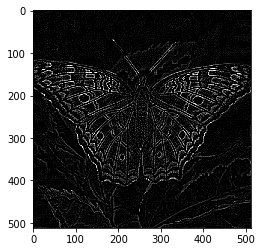

In [5]:
imt = cv2.imread('png_images/butterfly.png',0)
img = img.astype(np.float32)
h1_img = apply_filter(img, h1)
plt.imshow(h1_img, cmap='gray', vmin=0, vmax=255)
plt.show()

### Aplicando todos os filtros a imagem, sem normalização manual

In [6]:
import cv2

img = cv2.imread('png_images/butterfly.png', 0)
img = img.astype(np.float32)
h1_img = apply_filter(img, h1)
h2_img = apply_filter(img, h2)
h3_img = apply_filter(img, h3)
h4_img = apply_filter(img, h4)
h5_img = apply_filter(img, h5)
h6_img = apply_filter(img, h6)
h7_img = apply_filter(img, h7)
h8_img = apply_filter(img, h8)


h3and4_img = np.sqrt(np.power(h3_img, 2) + np.power(h4_img, 2))


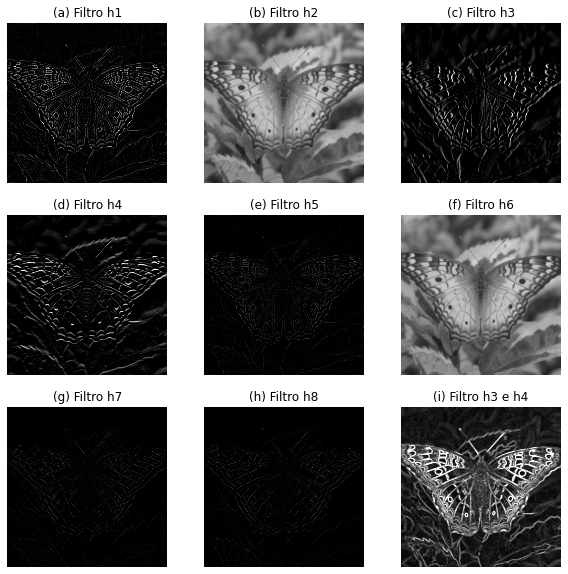

In [7]:
fig4 = plt.figure(figsize=[10,10])

# Show image
ax1 = fig4.add_subplot(3,3,1) 
ax1.imshow(h1_img, cmap='gray', vmin=0, vmax=255)
ax1.set_title('(a) Filtro h1')
plt.axis('off')


ax12 = fig4.add_subplot(3,3,2) 
ax12.imshow(h2_img, cmap='gray', vmin=0, vmax=255)
ax12.set_title('(b) Filtro h2')
plt.axis('off')


ax2 = fig4.add_subplot(3,3,3)
ax2.imshow(h3_img,cmap='gray', vmin=0, vmax=255)
ax2.set_title('(c) Filtro h3')
plt.axis('off')


ax3 = fig4.add_subplot(3,3,4)
ax3.imshow(h4_img, cmap='gray', vmin=0, vmax=255)
ax3.set_title('(d) Filtro h4')
plt.axis('off')

ax13 = fig4.add_subplot(3,3,5)
ax13.imshow(h5_img, cmap='gray', vmin=0, vmax=255)
ax13.set_title('(e) Filtro h5')
plt.axis('off')

ax4 = fig4.add_subplot(3,3,6)
ax4.imshow(h6_img, cmap='gray', vmin=0, vmax=255)
ax4.set_title('(f) Filtro h6')
plt.axis('off')

ax5 = fig4.add_subplot(3,3,7)
ax5.imshow(h7_img, cmap='gray', vmin=0, vmax=255)
ax5.set_title('(g) Filtro h7')
plt.axis('off')

ax14 = fig4.add_subplot(3,3,8)
ax14.imshow(h8_img, cmap='gray', vmin=0, vmax=255)
ax14.set_title('(h) Filtro h8')
plt.axis('off')

ax6 = fig4.add_subplot(3,3,9)
ax6.imshow(h3and4_img, cmap='gray', vmin=0, vmax=255)
ax6.set_title('(i) Filtro h3 e h4')
plt.axis('off')

fig4.savefig('results/butterfly_all_filters.png')


# Filtros com normalização manual
## Função de normalização para [0,255]

In [8]:
def normalize(img):
    i_max = img.max()
    i_min = img.min()
    normalized_img = 255/(i_max - i_min)*(img- i_min) 
    return np.round(normalized_img).astype(np.uint8)

## Aplicando filtros e normalização

In [12]:
img = cv2.imread('png_images/butterfly.png', 0)
img = img.astype(np.float32)

h1_img = normalize(apply_filter(img, h1))

h2_img = (apply_filter(img, h2))
h3_img = (apply_filter(img, h3))
h2_img = normalize(h2_img)
h3_img = normalize(h3_img)

h4_img = normalize(apply_filter(img, h4))
h5_img = normalize(apply_filter(img, h5))
h6_img = normalize(apply_filter(img, h6))
h7_img = normalize(apply_filter(img, h7))
h8_img = normalize(apply_filter(img, h8))

h3and4_img = normalize(np.sqrt(np.power(h3_img, 2) + np.power(h4_img, 2)))

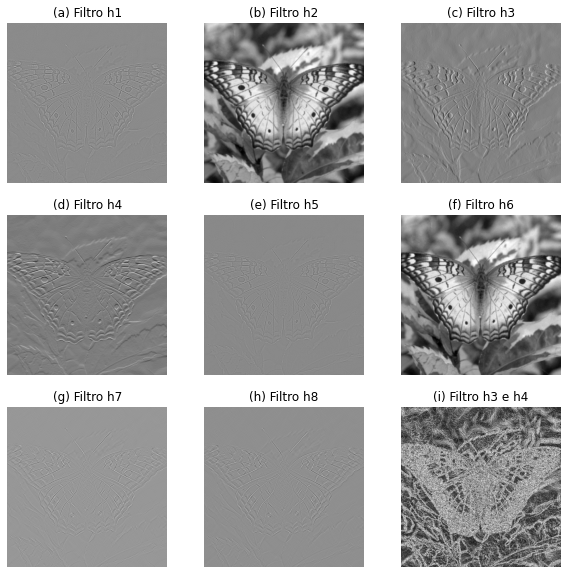

In [15]:
fig5 = plt.figure(figsize=[10,10])

# Show image
ax1 = fig5.add_subplot(3,3,1) 
ax1.imshow(h1_img, cmap='gray', vmin=0, vmax=255)
ax1.set_title('(a) Filtro h1')
plt.axis('off')


ax12 = fig5.add_subplot(3,3,2) 
ax12.imshow(h2_img, cmap='gray', vmin=0, vmax=255)
ax12.set_title('(b) Filtro h2')
plt.axis('off')


ax2 = fig5.add_subplot(3,3,3)
ax2.imshow(h3_img,cmap='gray', vmin=0, vmax=255)
ax2.set_title('(c) Filtro h3')
plt.axis('off')


ax3 = fig5.add_subplot(3,3,4)
ax3.imshow(h4_img, cmap='gray', vmin=0, vmax=255)
ax3.set_title('(d) Filtro h4')
plt.axis('off')

ax13 = fig5.add_subplot(3,3,5)
ax13.imshow(h5_img, cmap='gray', vmin=0, vmax=255)
ax13.set_title('(e) Filtro h5')
plt.axis('off')

ax4 = fig5.add_subplot(3,3,6)
ax4.imshow(h6_img, cmap='gray', vmin=0, vmax=255)
ax4.set_title('(f) Filtro h6')
plt.axis('off')

ax5 = fig5.add_subplot(3,3,7)
ax5.imshow(h7_img, cmap='gray', vmin=0, vmax=255)
ax5.set_title('(g) Filtro h7')
plt.axis('off')

ax14 = fig5.add_subplot(3,3,8)
ax14.imshow(h8_img, cmap='gray', vmin=0, vmax=255)
ax14.set_title('(h) Filtro h8')
plt.axis('off')

ax6 = fig5.add_subplot(3,3,9)
ax6.imshow(h3and4_img, cmap='gray')
ax6.set_title('(i) Filtro h3 e h4')
plt.axis('off')

fig5.savefig('results/butterfly_all_filters_norm.png')


# Playground
Essa parte pode ser ignorada, somente uma área para testar as imagens e filtros caso desejar.

In [24]:
img = cv2.imread('png_images/house.png', 0)

img = img.astype(np.float32)
h1_img = apply_filter(img, h1)
h2_img = apply_filter(img, h2)
h3_img = apply_filter(img, h3)
h4_img = apply_filter(img, h4)
h5_img = apply_filter(img, h5)
h6_img = apply_filter(img, h6)
h7_img = apply_filter(img, h7)
h8_img = apply_filter(img, h8)


h3and4_img = np.sqrt(np.power(h3_img, 2) + np.power(h4_img, 2))


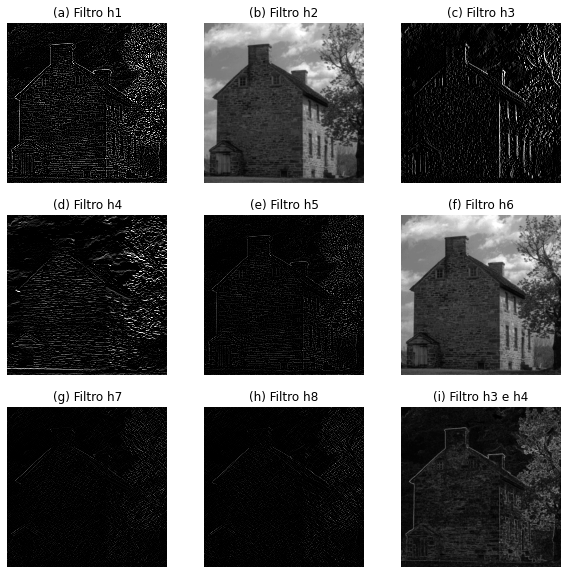

In [25]:
fig6 = plt.figure(figsize=[10,10])

# Show image
ax1 = fig6.add_subplot(3,3,1) 
ax1.imshow(h1_img, cmap='gray', vmin=0, vmax=255)
ax1.set_title('(a) Filtro h1')
plt.axis('off')


ax12 = fig6.add_subplot(3,3,2) 
ax12.imshow(h2_img, cmap='gray', vmin=0, vmax=255)
ax12.set_title('(b) Filtro h2')
plt.axis('off')


ax2 = fig6.add_subplot(3,3,3)
ax2.imshow(h3_img,cmap='gray', vmin=0, vmax=255)
ax2.set_title('(c) Filtro h3')
plt.axis('off')


ax3 = fig6.add_subplot(3,3,4)
ax3.imshow(h4_img, cmap='gray', vmin=0, vmax=255)
ax3.set_title('(d) Filtro h4')
plt.axis('off')

ax13 = fig6.add_subplot(3,3,5)
ax13.imshow(h5_img, cmap='gray', vmin=0, vmax=255)
ax13.set_title('(e) Filtro h5')
plt.axis('off')

ax4 = fig6.add_subplot(3,3,6)
ax4.imshow(h6_img, cmap='gray', vmin=0, vmax=255)
ax4.set_title('(f) Filtro h6')
plt.axis('off')

ax5 = fig6.add_subplot(3,3,7)
ax5.imshow(h7_img, cmap='gray', vmin=0, vmax=255)
ax5.set_title('(g) Filtro h7')
plt.axis('off')

ax14 = fig6.add_subplot(3,3,8)
ax14.imshow(h8_img, cmap='gray', vmin=0, vmax=255)
ax14.set_title('(h) Filtro h8')
plt.axis('off')

ax6 = fig6.add_subplot(3,3,9)
ax6.imshow(h3and4_img, cmap='gray')
ax6.set_title('(i) Filtro h3 e h4')
plt.axis('off')

fig6.savefig('results/city_no_norm.png')
